## <center> *1. Walmart Sales Analysis*

#### -- Importing "Pandas" to read sales data from "Walmart Sales.xlsx"

In [2]:
import pandas as pd

df = pd.read_excel("D:\Data Analyst Bootcamp\Python Module\Walmart Sales Analysis\Walmart Sales.xlsx")
df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,1/5/2019,13:08:00,Ewallet,9.1
1,226-31-3081,A,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3/8/2019,10:29:00,Cash,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,3/3/2019,13:23:00,Credit card,7.4
3,123-19-1176,B,Yangon,Member,Male,Health and beauty,58.22,8,1/27/2019,20:33:00,Ewallet,8.4
4,373-73-7910,C,Yangon,Normal,Male,Sports and travel,86.31,7,2/8/2019,10:37:00,Ewallet,5.3


#### -- Creating "Revenue" Column

In [3]:
df['Revenue'] = df['Quantity'] * df['Unit price']
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating,Revenue
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,1/5/2019,13:08:00,Ewallet,9.1,522.83
1,226-31-3081,A,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3/8/2019,10:29:00,Cash,9.6,76.40
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,3/3/2019,13:23:00,Credit card,7.4,324.31
3,123-19-1176,B,Yangon,Member,Male,Health and beauty,58.22,8,1/27/2019,20:33:00,Ewallet,8.4,465.76
4,373-73-7910,C,Yangon,Normal,Male,Sports and travel,86.31,7,2/8/2019,10:37:00,Ewallet,5.3,604.17


### <center> *A. Analyze the performance of sales and revenue at the city and branch level*
#### -- Importing "matplotlib.pyplot" and "numpy" to plot the column chart representing the performance of sales & revenue by city

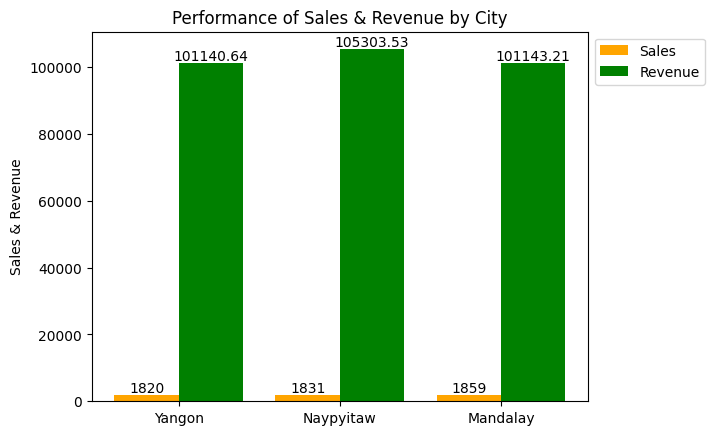

In [4]:
import matplotlib.pyplot as plt
import numpy as np

city_performance = df.groupby('City').agg({'Quantity': 'sum', 'Revenue': 'sum'})
city_count = np.arange(len(df['City'].unique()))
sales = city_performance['Quantity']
revenue = city_performance['Revenue']

plt.xticks(city_count, df['City'].unique())
plt.ylabel("Sales & Revenue")
plt.title("Performance of Sales & Revenue by City")

sales_bars = plt.bar(city_count - 0.2, sales, width=0.4, label='Sales', color='orange')
revenue_bars = plt.bar(city_count + 0.2, revenue, width=0.4, label='Revenue', color='green')

for bar in sales_bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:0}', ha='center', va='bottom')

for bar in revenue_bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

#### Insights from the performance of sales & revenue by city (Jan to Mar)
- Naypyitaw city has generated the highest revenue of around **105303.53**, which is **34%** of the total revenue
- Mandalay city has sold over **1859** units which is the highest in 3 months
- Walmart Sales in these 3 cities are doing equally well

#### -- Plotting a bar chart to analyze the performance of sales & revenue by branch

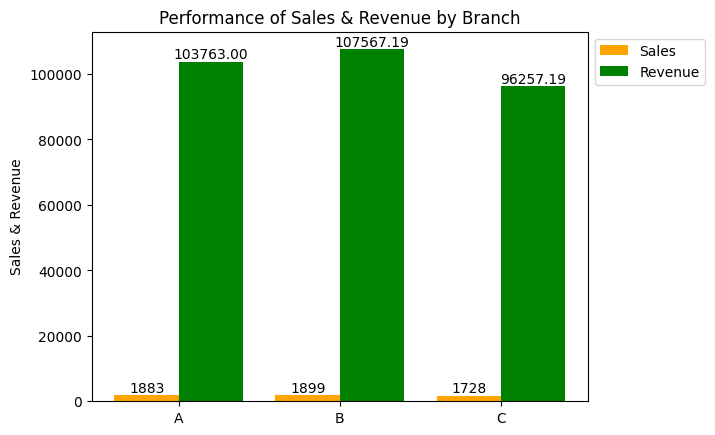

In [5]:
branch_performance = df.groupby('Branch').agg({'Quantity': 'sum', 'Revenue': 'sum'})
branch_count = np.arange(len(df['Branch'].unique()))
sales = branch_performance['Quantity']
revenue = branch_performance['Revenue']

plt.xticks(branch_count, df['Branch'].unique())
plt.ylabel("Sales & Revenue")
plt.title("Performance of Sales & Revenue by Branch")

sales_bars = plt.bar(branch_count - 0.2, sales, width=0.4, label='Sales', color='orange')
revenue_bars = plt.bar(branch_count + 0.2, revenue, width=0.4, label='Revenue', color='green')

for bar in sales_bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:0}', ha='center', va='bottom')

for bar in revenue_bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

#### Insights from the performance of sales & revenue by branch (Jan to Mar)
- Branch **B** has generated the highest revenue of around **107567.19** with the highest number of units sold
- Branch **C** lags behind Branch **A** & **B**, having generated **31%** of total revenue which is lower than the **1 lakh** mark
- Both Branches **A** & **B** crossed the **1 lakh** revenue mark

### <center> *B. What is the average price of an item sold at each branch of the city*

In [6]:
avg_price = df.groupby(['City', 'Branch']).agg({'Unit price': 'mean'})
avg_price['Average Unit price'] = avg_price['Unit price'].round(2)    

branch_avg_price = avg_price.sort_values(by=['City', 'Average Unit price'], ascending=[True, False])
branch_avg_price[['Average Unit price']]

Average Unit price
City      Branch                    
Mandalay  C                    57.96
          B                    56.13
          A                    53.35
Naypyitaw C                    57.94
          B                    57.79
          A                    54.12
Yangon    B                    56.01
          A                    55.64
          C                    52.68

#### Insights from the table showing average price of an item sold at each branch by city (Jan to Mar)
- Branches in **Naypyitaw** city has overall highest average unit price, compared to other two cities. This might be one of the reasons, it tops the list in revenue generation

### *C. Analyze the performance of sales and revenue, Month over Month across the Product line, Gender, and Payment Method*
9*

#### -- Month over Month Performance of Sales by Product Line

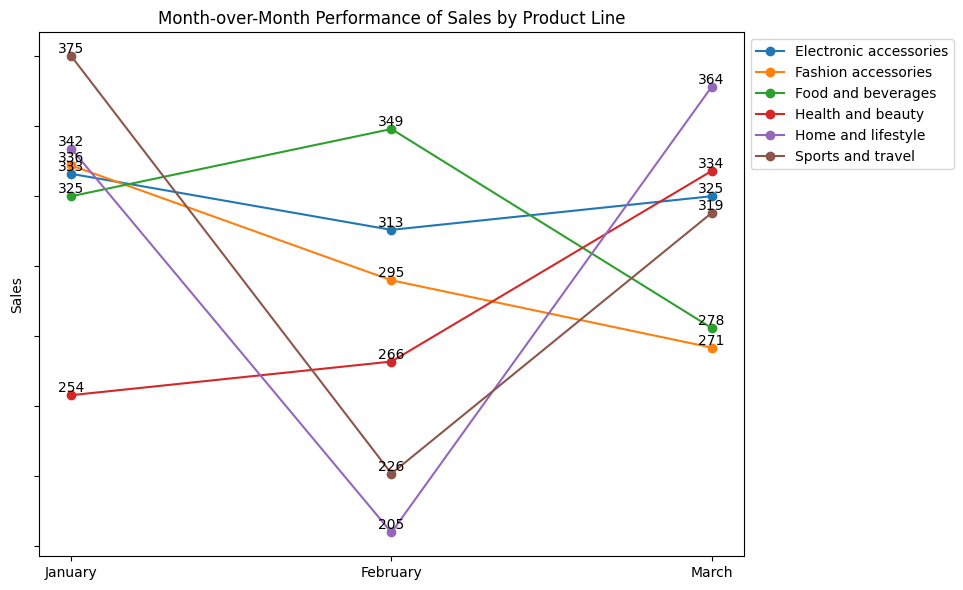

In [7]:
df['Date'] = pd.to_datetime(df['Date'])
monthly_summary = df.groupby([df['Date'].dt.month, 'Product line']).agg({
    'Quantity': 'sum',
}).reset_index()

pivot_table = monthly_summary.pivot(index='Date', columns='Product line', values='Quantity')

fig, ax = plt.subplots(figsize=(10, 6))
pivot_table.plot(ax=ax, marker='o')

for product_line in pivot_table.columns:
    for i, value in enumerate(pivot_table[product_line]):
        ax.text(i+1, value, f'{value:0}', ha='center', va='bottom')
        
ax.set_xlabel(None)
ax.set_ylabel('Sales')
ax.set_title('Month-over-Month Performance of Sales by Product Line')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(range(1, 4), ['January', 'February', 'March'])
plt.tight_layout()
ax.set_yticklabels([])
plt.show()

#### -- Month over Month Performance of Revenue by Product Line

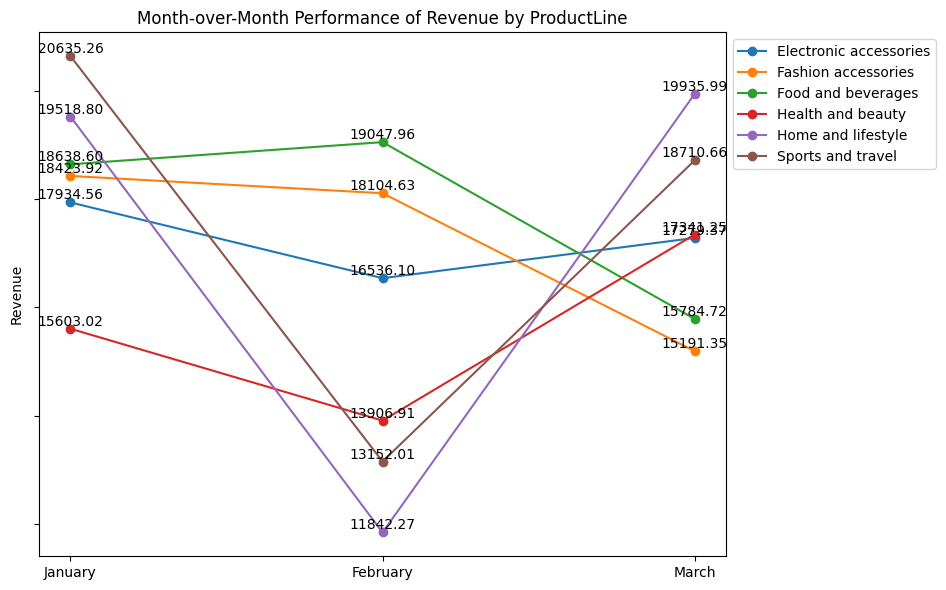

In [8]:
monthly_summary = df.groupby([df['Date'].dt.month, 'Product line']).agg({
    'Revenue': 'sum'}).reset_index()

pivot_table = monthly_summary.pivot(index='Date', columns='Product line', values='Revenue')

fig, ax = plt.subplots(figsize=(10, 6))
pivot_table.plot(ax=ax, marker='o')

for product_line in pivot_table.columns:
    for i, value in enumerate(pivot_table[product_line]):
        ax.text(i+1, value, f'{value:.2f}', ha='center', va='bottom')
        
ax.set_xlabel(None)
ax.set_ylabel('Revenue')
ax.set_title('Month-over-Month Performance of Revenue by ProductLine')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(range(1, 4), ['January', 'February', 'March'])
plt.tight_layout()
ax.set_yticklabels([])
plt.show()

#### Insights from the m-o-m performance of sales & revenue across product line (Jan to Mar)
- Both **Home and lifestyle** & **Sports and travel** product line has seen a great comeback in March with <span style="color:green;font:bold;">77% & 41%</span> m-o-m growth respectively 
- **Fashion accessories** product line has seen <span style="color:red;">8 to 13%</span> decline in sales monthly 
- Only **Electronics and accessories** product line haven't saw any major changes in sales
- **Food and beverages** recorded <span style="color:red;">17%</span> decline, which is the highest compared to **Fashion accessories**

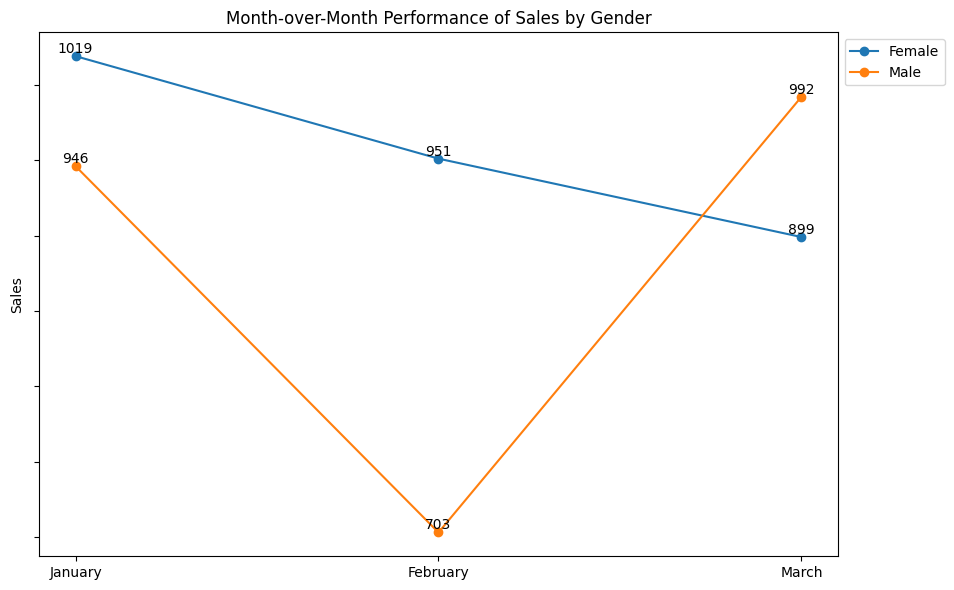

In [9]:
monthly_summary = df.groupby([df['Date'].dt.month, 'Gender']).agg({
    'Quantity': 'sum'}).reset_index()

pivot_table = monthly_summary.pivot(index='Date', columns='Gender', values='Quantity')

fig, ax = plt.subplots(figsize=(10, 6))
pivot_table.plot(ax=ax, marker='o')

for product_line in pivot_table.columns:
    for i, value in enumerate(pivot_table[product_line]):
        ax.text(i+1, value, f'{value:0}', ha='center', va='bottom')
        
ax.set_xlabel(None)
ax.set_ylabel('Sales')
ax.set_title('Month-over-Month Performance of Sales by Gender')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(range(1, 4), ['January', 'February', 'March'])
plt.tight_layout()
ax.set_yticklabels([])
plt.show()

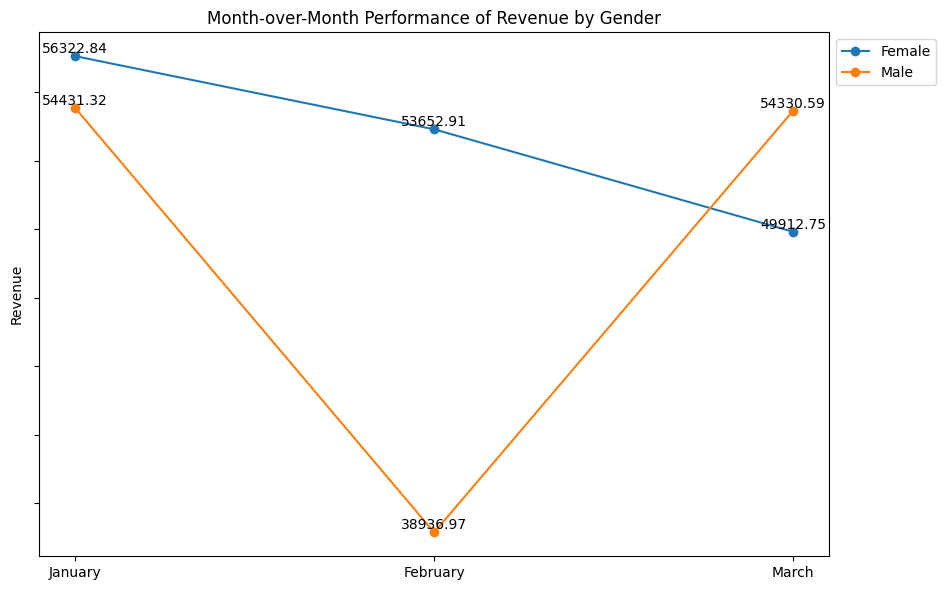

In [10]:
monthly_summary = df.groupby([df['Date'].dt.month, 'Gender']).agg({
    'Revenue': 'sum'}).reset_index()

pivot_table = monthly_summary.pivot(index='Date', columns='Gender', values='Revenue')

fig, ax = plt.subplots(figsize=(10, 6))
pivot_table.plot(ax=ax, marker='o')

for product_line in pivot_table.columns:
    for i, value in enumerate(pivot_table[product_line]):
        ax.text(i+1, value, f'{value:.2f}', ha='center', va='bottom')
        
ax.set_xlabel(None)
ax.set_ylabel('Revenue')
ax.set_title('Month-over-Month Performance of Revenue by Gender')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(range(1, 4), ['January', 'February', 'March'])
plt.tight_layout()
ax.set_yticklabels([])
plt.show()

#### Insights from the m-o-m performance of sales & revenue across Gender (Jan to Mar)
- Products purchased by **Male** Customers soared drastically from February making <span style="color:green;">39%</span> m-o-m growth in March, which surpassed revenue generated from **Female** Customers
- Revenue generated from **Female** customers recorded <span style="color:red;">4 to 7%</span> m-o-m decline

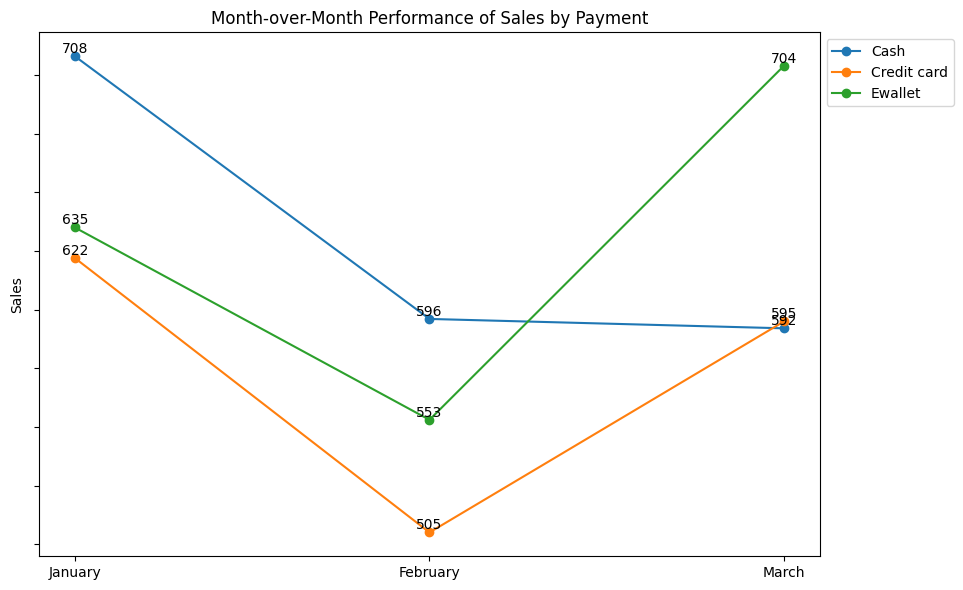

In [11]:
monthly_summary = df.groupby([df['Date'].dt.month, 'Payment']).agg({
    'Quantity': 'sum'}).reset_index()

pivot_table = monthly_summary.pivot(index='Date', columns='Payment', values='Quantity')

fig, ax = plt.subplots(figsize=(10, 6))
pivot_table.plot(ax=ax, marker='o')

for product_line in pivot_table.columns:
    for i, value in enumerate(pivot_table[product_line]):
        ax.text(i+1, value, f'{value:0}', ha='center', va='bottom')
        
ax.set_xlabel(None)
ax.set_ylabel('Sales')
ax.set_title('Month-over-Month Performance of Sales by Payment')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(range(1, 4), ['January', 'February', 'March'])
plt.tight_layout()
ax.set_yticklabels([])
plt.show()

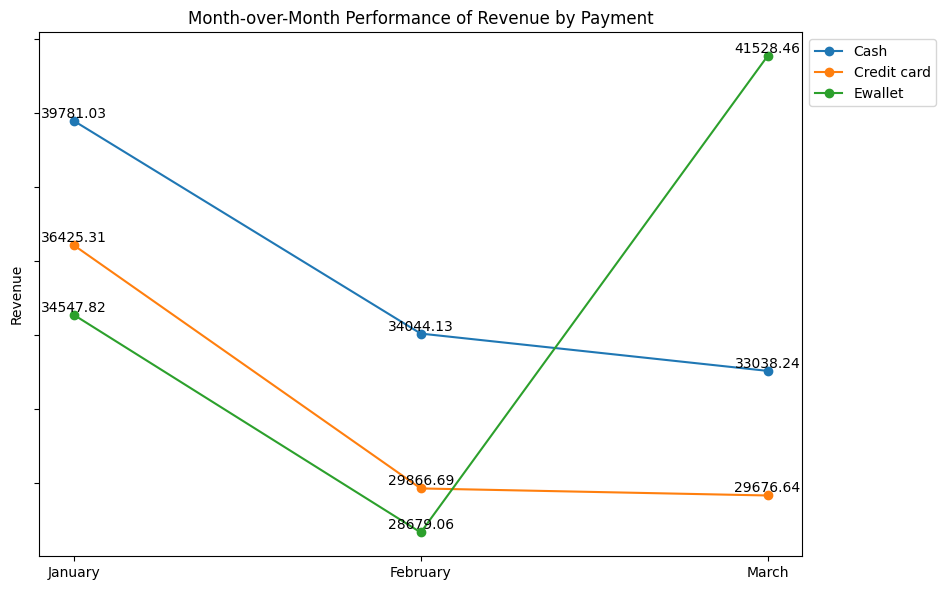

In [12]:
monthly_summary = df.groupby([df['Date'].dt.month, 'Payment']).agg({
    'Revenue': 'sum'}).reset_index()

pivot_table = monthly_summary.pivot(index='Date', columns='Payment', values='Revenue')

fig, ax = plt.subplots(figsize=(10, 6))
pivot_table.plot(ax=ax, marker='o')

for product_line in pivot_table.columns:
    for i, value in enumerate(pivot_table[product_line]):
        ax.text(i+1, value, f'{value:.2f}', ha='center', va='bottom')
        
ax.set_xlabel(None)
ax.set_ylabel('Revenue')
ax.set_title('Month-over-Month Performance of Revenue by Payment')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(range(1, 4), ['January', 'February', 'March'])
plt.tight_layout()
ax.set_yticklabels([])
plt.show()

#### Insights from the m-o-m performance of sales & revenue across Payment methods (Jan to Mar)
- Payments made through **Ewallet** saw <span style="color:green;">44%</span> m-o-m growth in March, which is the highest among all payment methods. On the other side, payments made through **Cash** & **Credit card** saw m-o-m decline from January to March
- **Cash** payments recorded <span style="color:red;">16%</span> decline till date
- **Credit Card** payments recorded the highest decline of around <span style="color:red;">18%</span> till date 

### <center> Focus areas to get better sales in April 2019
- Product lines - **Fashion accessories & Food and beverages** need focus as the sales shrinks to <span style="color:red;">13%</span> and <span style="color:red;">17%</span> respectively
- Introducing new products and offers in all other product lines will help boost sales as customers are more likely to invest in those product lines
- Improving focus on **Health and beauty, Fashion accessories & Home and lifestyle** product lines will help in attracting more **Female** customers 